CROP RECOMMENDATION BASED ON SOIL AND CLIMATE CONDITIONS

##Project Overview
Goal: Build a machine learning model to predict the recommended crop based on soil and climate features.

Tools: Python, FastAPI, Scikit-learn, Docker, GitHub Actions, and a cloud service (e.g., Heroku or AWS) for deployment.

#Steps:
1.Data exploration and preprocessing

2.Model training and evaluation

3.API development with FastAPI

4.Dockerization

5.CI/CD with GitHub Actions

6.Deployment


##Step 1: Data Exploration and Preprocessing

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("../Crop_Recommendation.csv")
print("First 5 rows:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nCrop Distribution:")
print(data['Crop'].value_counts())
print("\nMissing Values:")
print(data.isnull().sum())
print("\nDescriptive Statistics:")
print(data.describe())


First 5 rows:
   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Crop  
0  202.935536  Rice  
1  226.655537  Rice  
2  263.964248  Rice  
3  242.864034  Rice  
4  262.717340  Rice  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   p

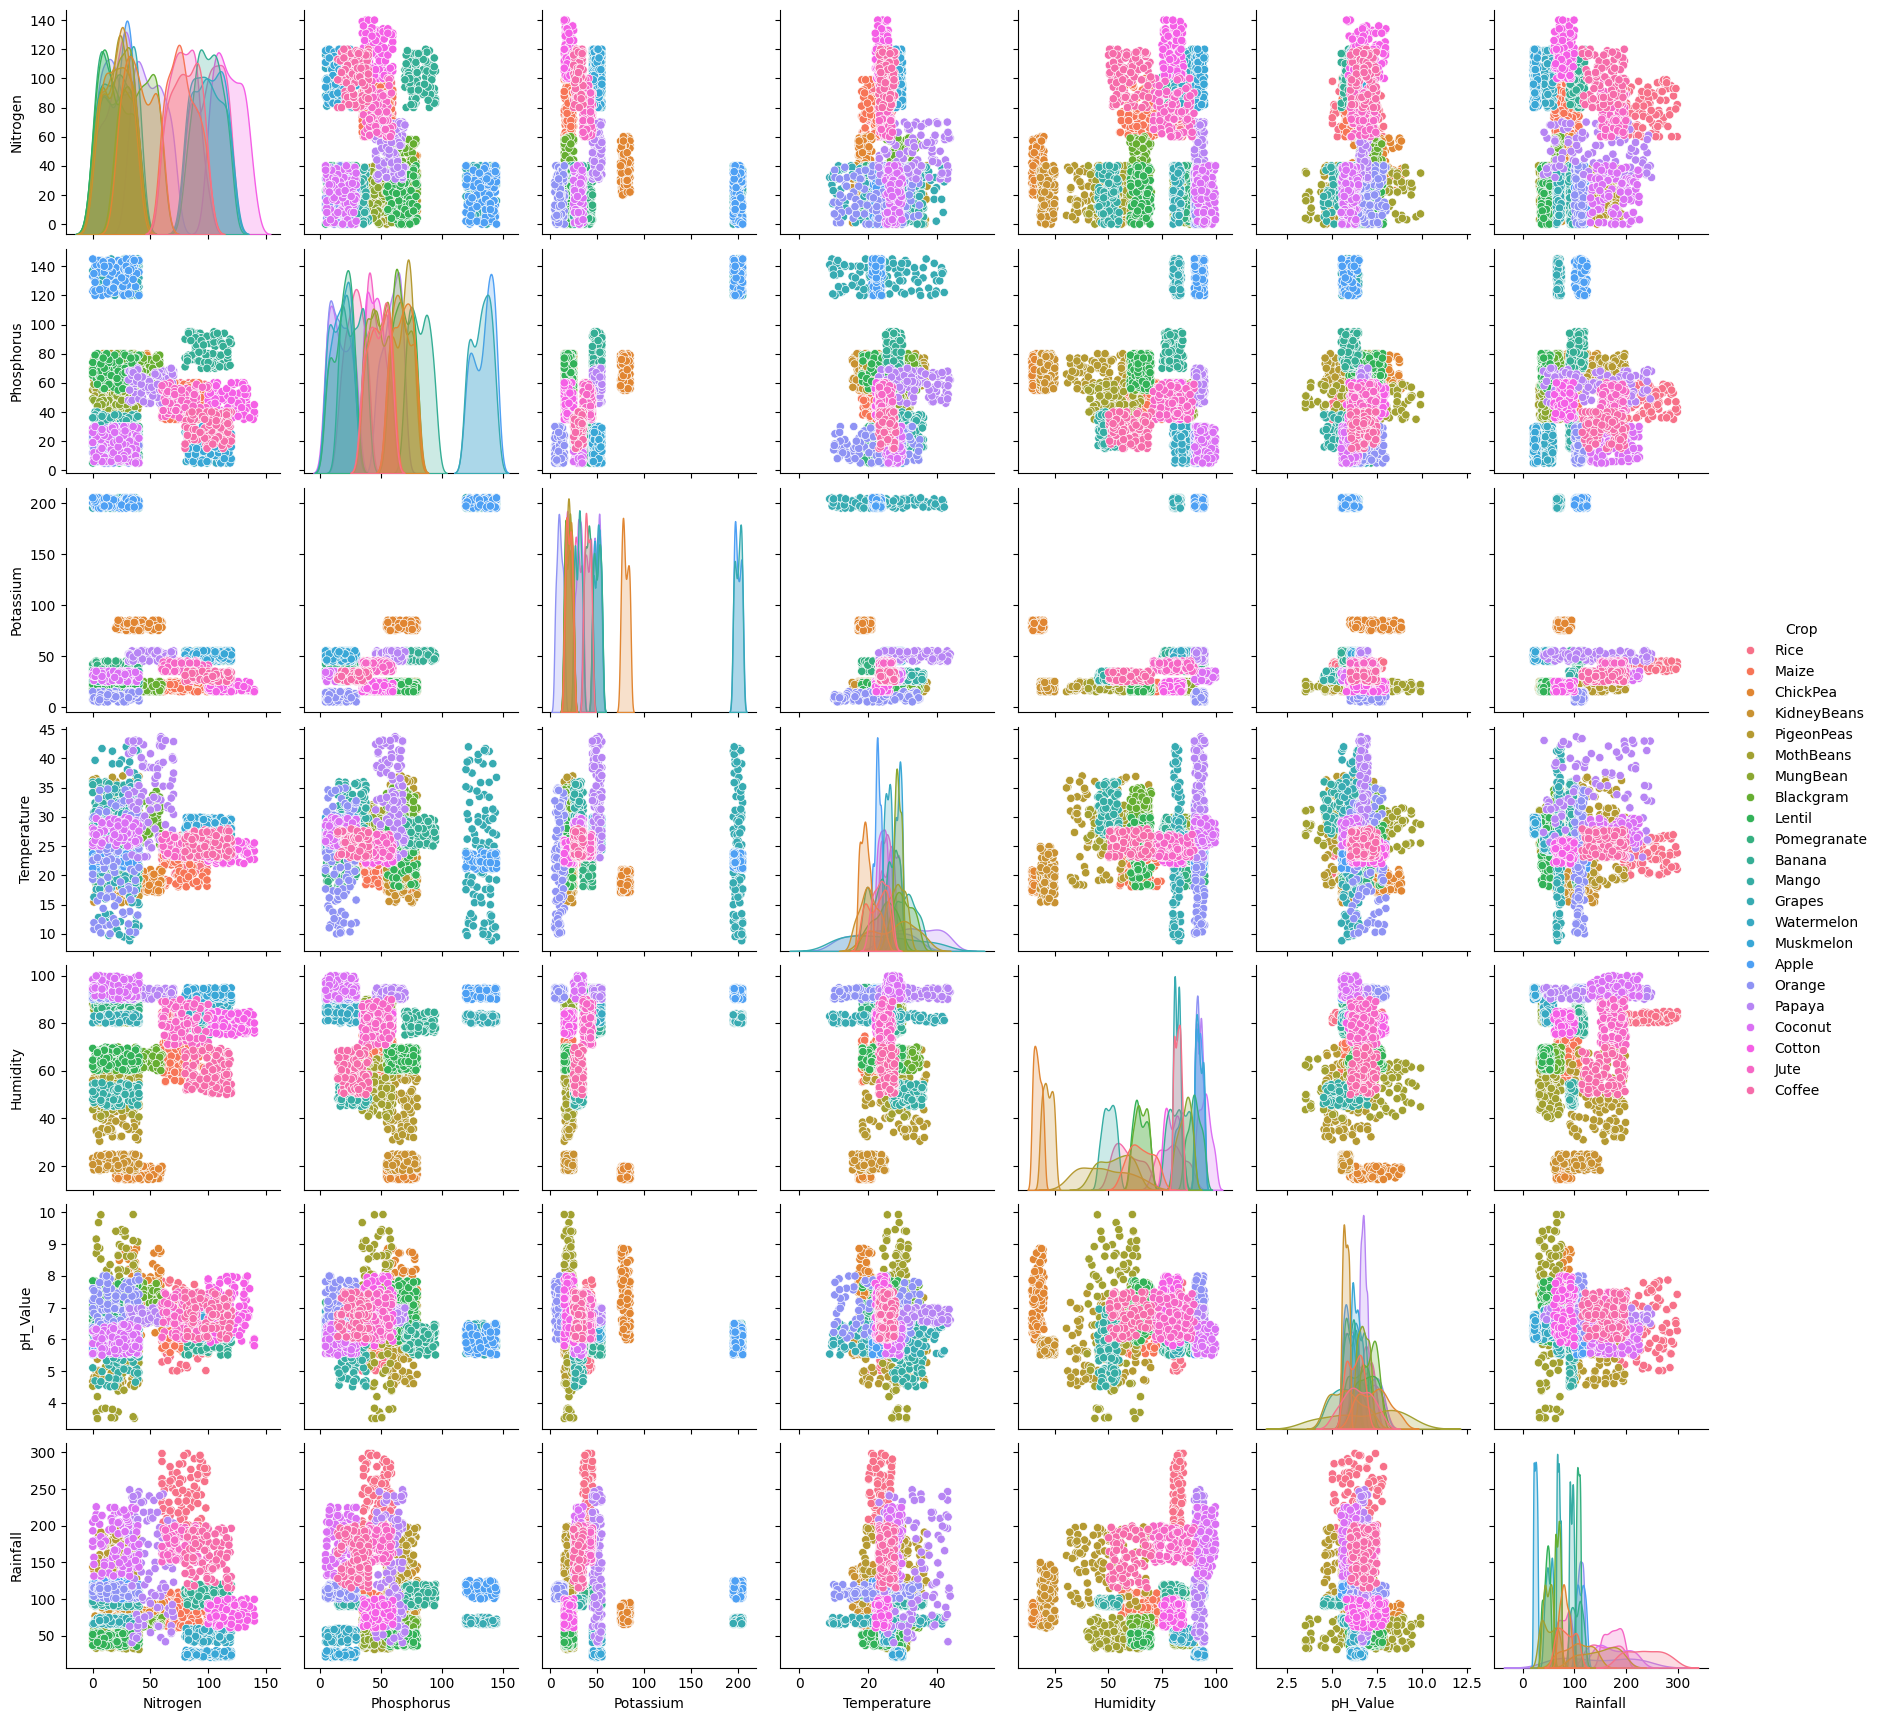

In [16]:
# Visualize feature distributions
sns.pairplot(data, hue="Crop")
plt.show()

###Observations:
 The dataset has no missing values, and features are numerical. The target Crop has multiple classes (e.g., Rice, Maize, ChickPea), suggesting a multi-class classification problem.

###Preprocessing:
 Features appear to be on different scales (e.g., Rainfall vs. pH_Value), so standardization may help.



In [7]:
X = data.drop("Crop", axis=1)
y = data["Crop"]

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Train model
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Evaluate
import os
import joblib
from sklearn.metrics import accuracy_score, classification_report


y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Save model and scaler
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/crop_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")

Accuracy: 0.9931818181818182
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       1.00      1.00      1.00        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      1.00      0.96        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.92      1.00      0.96        11
       Maize       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      0.96      0.98        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1.00        1

['models/scaler.pkl']

Outcome: The Random Forest model typically performs well on this dataset (accuracy ~90%+). The trained model and scaler are saved for inference.

#Step 3: API Development with FastAPI

###Create a REST API to serve predictions.


In [19]:
%pip install fastapi uvicorn
from fastapi import FastAPI # type: ignore
from pydantic import BaseModel
import joblib
import numpy as np

app = FastAPI()

# Load model and scaler
model = joblib.load("models/crop_model.pkl")
scaler = joblib.load("models/scaler.pkl")

# Define input data structure
class CropInput(BaseModel):
    Nitrogen: float
    Phosphorus: float
    Potassium: float
    Temperature: float
    Humidity: float
    pH_Value: float
    Rainfall: float

@app.post("/predict")
def predict_crop(data: CropInput):
    # Convert input to numpy array
    input_data = np.array([[data.Nitrogen, data.Phosphorus, data.Potassium, 
                            data.Temperature, data.Humidity, data.pH_Value, 
                            data.Rainfall]])
    
    # Scale input
    input_scaled = scaler.transform(input_data)
    
    # Predict
    prediction = model.predict(input_scaled)[0]
    return {"recommended_crop": prediction}

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
